# Decision Trees 

Let's begin showing a visual example of what a DT wants to do. Example from  Alvaro Fuentes, 'Hands-On Predictive Analytics with Python' provided by Leslie Kerby.

In [ ]:
#Import Packages 
from sklearn.datasets import make_blobs #this is a built in dataset from sklearn used for teaching machine learning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First we will plot our data to see what exactly we are working with. 

Text(0, 0.5, 'X2')

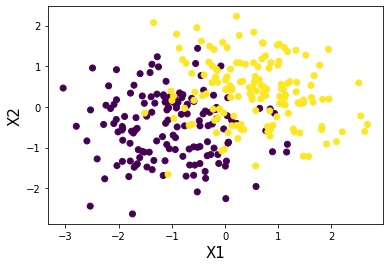

In [ ]:
A,b = make_blobs(n_samples=300, n_features=2, cluster_std=0.8, centers=[[-1,-0.5],[0.5,0.5]],shuffle=False,random_state=39)
plt.scatter(A[:,0],A[:,1],c=b)
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15)

You will notice we have two classes (yellow blobs and purple blobs). We want a model that can classify yellow blobs and purple blobs. Using a DT, we just need splits until we can narrow down the data. Let's make the first split a horizontal line down the middle. 

Text(0, 0.5, 'X2')

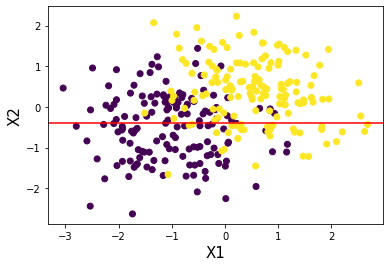

In [ ]:
plt.scatter(A[:,0],A[:,1],c=b)
plt.axhline(-0.4,c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15)

Our first "question" for our tree is if the x point is greater that .4. This does a pretty good job, but there are plenty of different points on each side of the line, lets create another split. This time with a verticle line  

0.46272015572457686

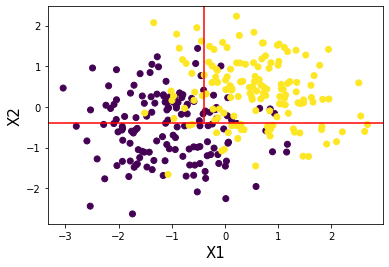

In [ ]:
plt.scatter(A[:,0],A[:,1],c=b)
plt.axhline(-0.4,c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15) #Just copy these four lines from above and add the rest. 
ymax = plt.ylim()[1]
ymin = plt.ylim()[0]
y_data = -0.4
y_transformed = (y_data - ymin) / (ymax - ymin)
plt.axvline(x=-0.4,ymin=y_transformed, c='red')

y_transformed

This is even better, but we could probably make one more split and avoid overfit. Let's add another V. Line 

Text(0, 0.5, 'X2')

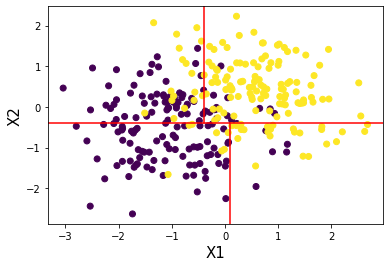

In [ ]:
plt.scatter(A[:,0],A[:,1],c=b)
plt.axhline(-0.4,c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15) #Just copy these four lines from above and add the rest. 
ymax = plt.ylim()[1]
ymin = plt.ylim()[0]
y_data = -0.4
y_transformed = (y_data - ymin) / (ymax - ymin)
plt.axvline(x=-0.4,ymin=y_transformed, c='red')

# Draw bottom vertical line
plt.axvline(x=0.1,ymax=y_transformed, c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15)

In theory, we could keep making splits until we correct every sample of data, but then we would have major overfit and our model wouldn't be as effective, remenber we want our models to classify outliers as well. 

# Decision Tree Classification Example 

Now let's train a classification model using Sklearn's decisionTreeClassifier class. We will use the cell phone provider churn dataset. 

In [ ]:
churn = pd.read_csv('https://gitlab.com/CEADS/DrKerby/python/raw/master/churn.txt')
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


First thing is first, lets explore the data.

In [ ]:
#Let's check missing values 
churn.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [ ]:
churn.shape

(3333, 21)

In [ ]:
churn['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

<AxesSubplot:>

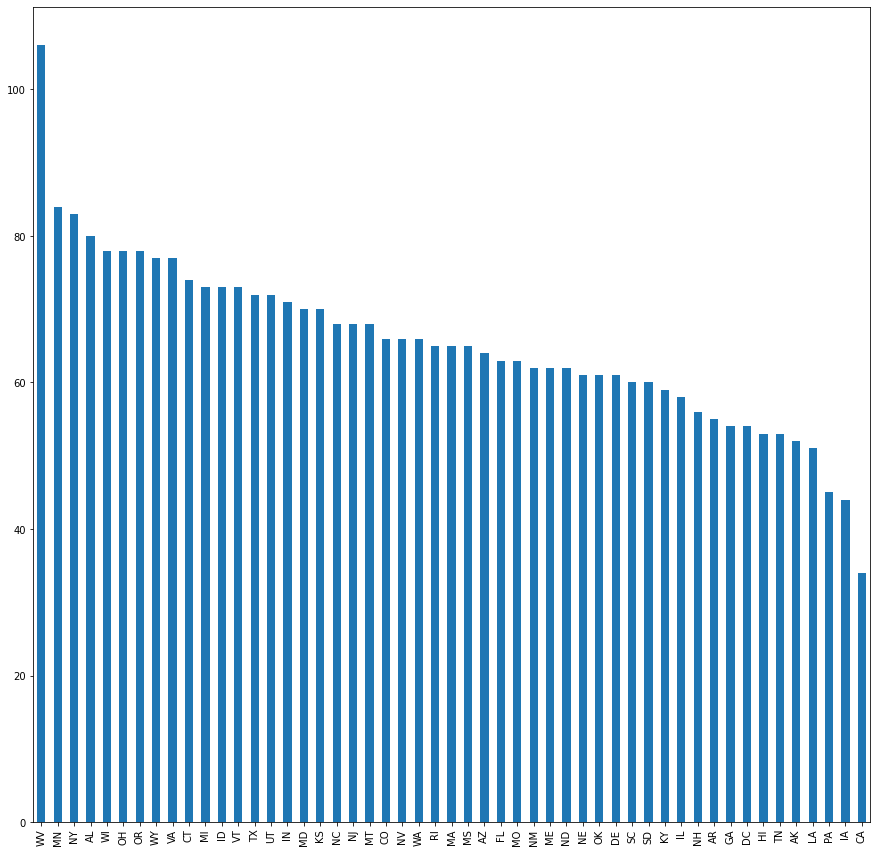

In [ ]:
#Let's visualize this data
churn['State'].value_counts().plot.bar(figsize=(15,15))

<AxesSubplot:>

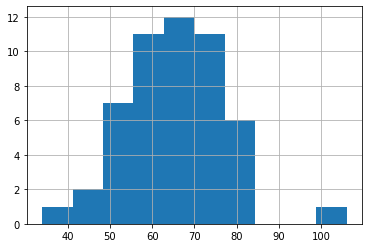

In [ ]:
#We create a histogram as well 
churn['State'].value_counts().hist()

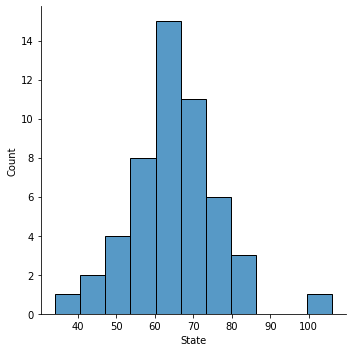

In [ ]:
#Seaborn will make this cleaner 
import seaborn as sns
sns.displot(churn['State'].value_counts())

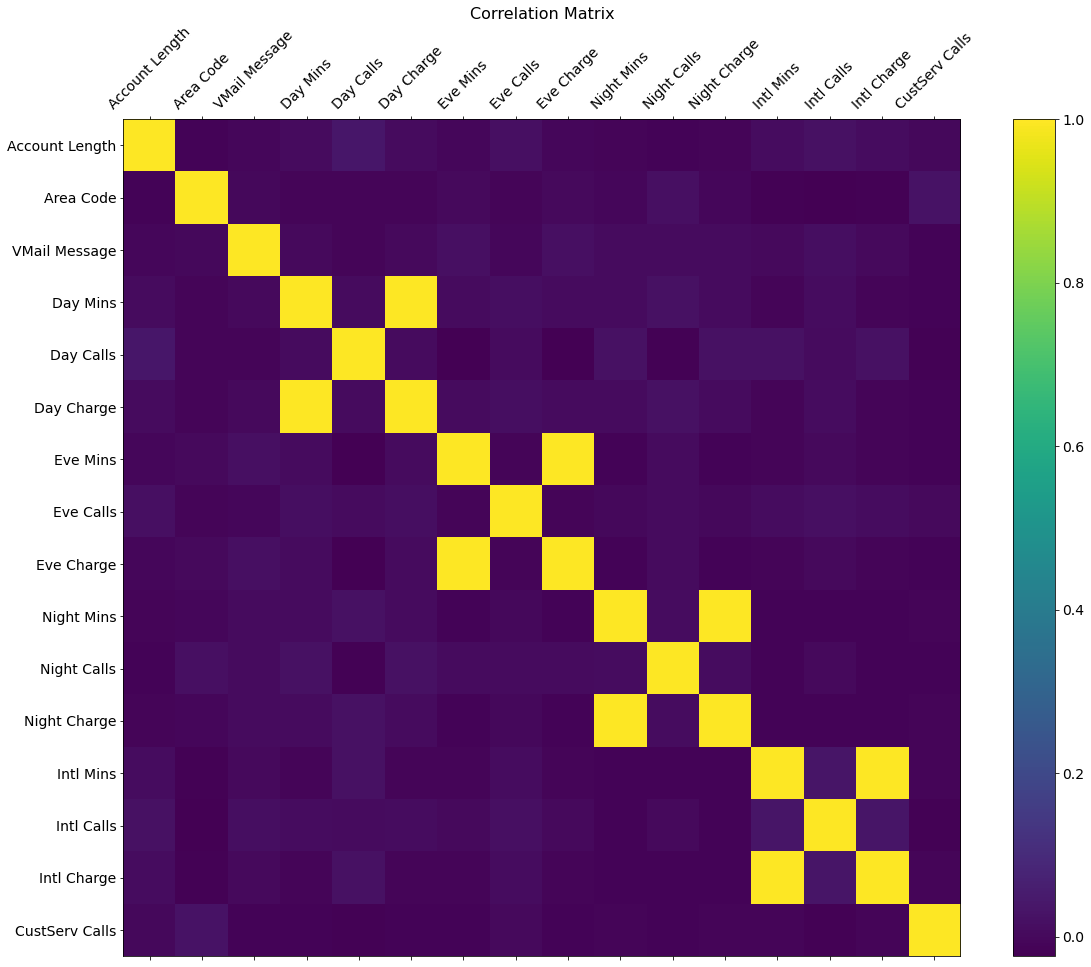

In [ ]:
# plt.matshow(churn.corr(),figsize=(10,10))
#Heat map of correlations matrix 
f = plt.figure(figsize=(19, 15))
plt.matshow(churn.corr(), fignum=f.number)
plt.xticks(range(churn.corr().shape[1]), churn.corr().columns, fontsize=14, rotation=45)
plt.yticks(range(churn.corr().shape[1]), churn.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

# Preprocessing for Training

In [ ]:
na_values = [' ','NaN','N/A']
churn = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/churn.txt',na_values=na_values)
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Our model is to help classify churn and none churn customers. So what is the target column going to be? 